In [1]:
## LEAD SCORING CASE STUDY

#Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler

In [2]:
lead_scoring= pd.read_csv("C://Users//PH2510//Desktop//Assignment//Lead Scoring Assignment//Leads.csv")
lead_scoring.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
# Checking total rows and columns in the dataset

lead_scoring.shape


(9240, 37)

In [6]:
# Doing some basic data checks
lead_scoring.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
lead_scoring.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [10]:
# Now let's check for duplicates Prospect ID

sum(lead_scoring.duplicated(subset = 'Prospect ID')) ==0

True

In [11]:
# Now let's check for duplicates Lead Number

sum(lead_scoring.duplicated(subset = 'Lead Number')) ==0

True

In [13]:
# Data Cleaning 

lead_scoring.drop(['Prospect ID','Lead Number'], 1, inplace = True)

In [14]:
# Converting some values to NaN

lead_scoring.replace('Select', np.nan)

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,NaN,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,India,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,India,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,India,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


In [15]:
# Check for null values in each row

lead_scoring.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [16]:
# check percentage of null values in each column

round(100*(lead_scoring.isnull().sum()/len(lead_scoring.index)),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [19]:
# Drop columns with more than 45% missing values

cols=lead_scoring.columns


for i in cols:
    if((100*(lead_scoring[i].isnull().sum()/len(lead_scoring.index))) >=45):
        lead_scoring.drop(i, 1, inplace =True)

In [20]:
# Now check null values percentage

round(100*(lead_scoring.isnull().sum()/len(lead_scoring.index)),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [21]:
# Perfoming Categorical Attributes Analysis

# Check value counts of country column

lead_scoring['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

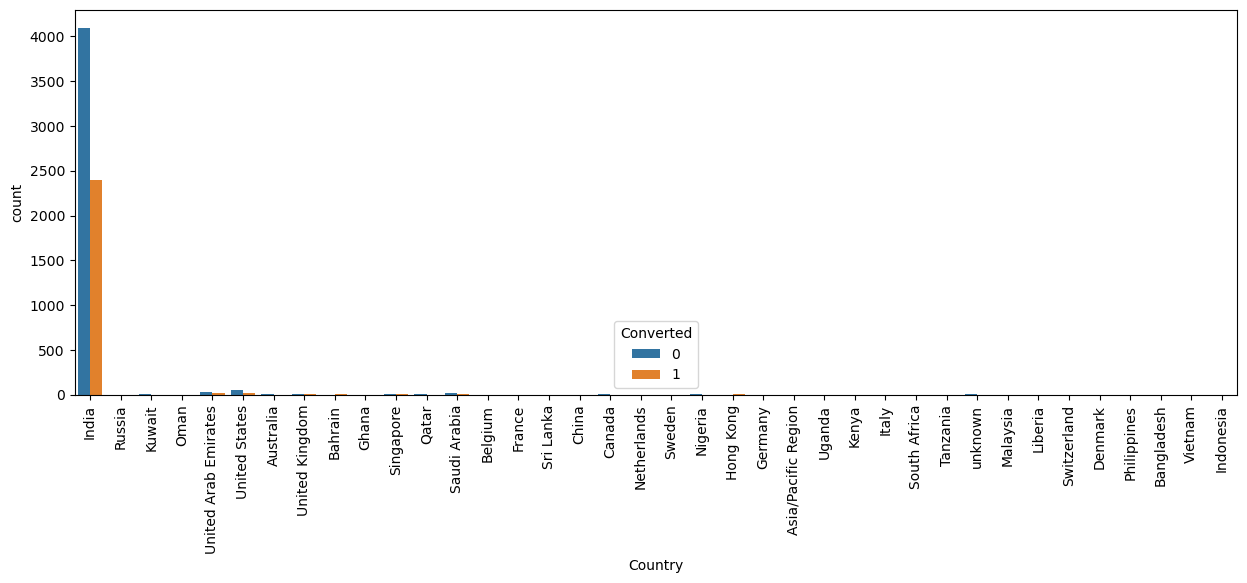

In [22]:
# Plotting Country column

plt.figure(figsize=(15,5))
s1=sns.countplot(lead_scoring.Country, hue=lead_scoring.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [23]:
# Since India is the most common occurence among the non-missing values we can impute all missing values with India

lead_scoring['Country'] = lead_scoring['Country'].replace(np.nan,'India')

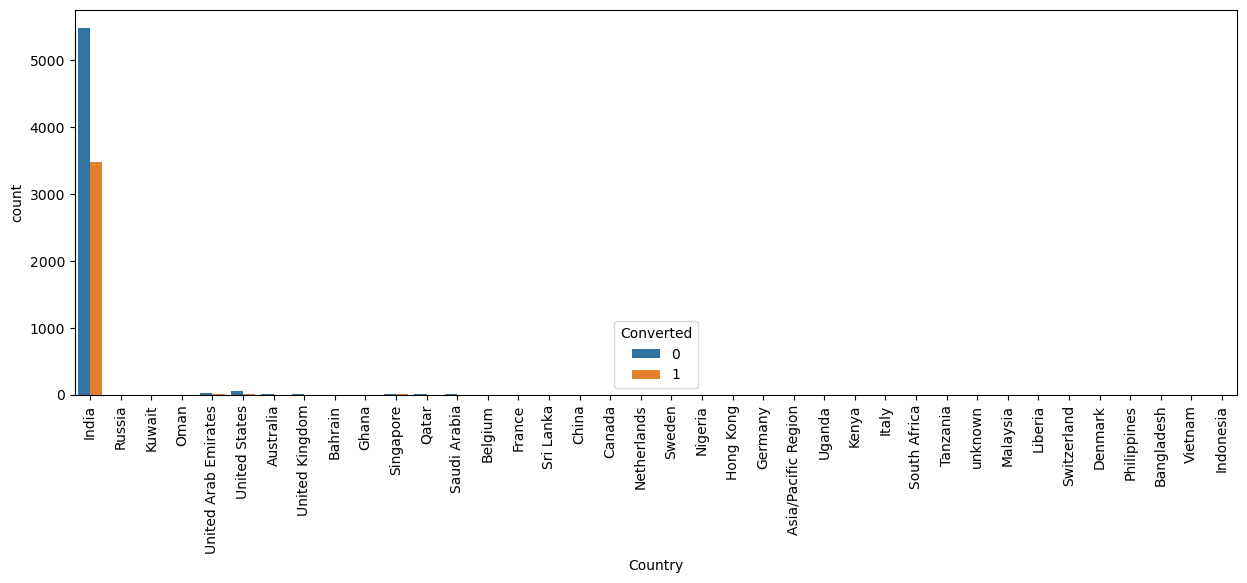

In [24]:
#plotting spread of Country columnn after replacing NaN values

plt.figure(figsize=(15,5))
s1=sns.countplot(lead_scoring.Country, hue=lead_scoring.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [25]:
#creating a list of columns to be droppped

cols_to_drop=['Country']

In [26]:
#checking value counts of "City" column

lead_scoring['City'].value_counts(dropna=False)

Mumbai                         3222
Select                         2249
NaN                            1420
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [27]:
lead_scoring['City'] = lead_scoring['City'].replace(np.nan,'Mumbai')

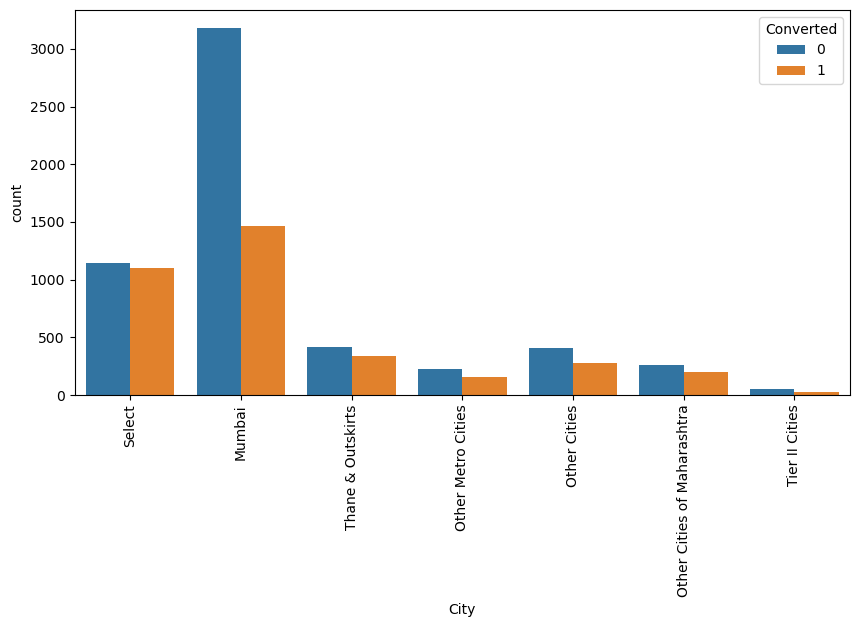

In [28]:
#plotting spread of City columnn after replacing NaN values

plt.figure(figsize=(10,5))
s1=sns.countplot(lead_scoring.City, hue=lead_scoring.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [29]:
#checking value counts of Specialization column

lead_scoring['Specialization'].value_counts(dropna=False)

Select                               1942
NaN                                  1438
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [30]:
lead_scoring['Specialization'] = lead_scoring['Specialization'].replace(np.nan, 'Not Specified')

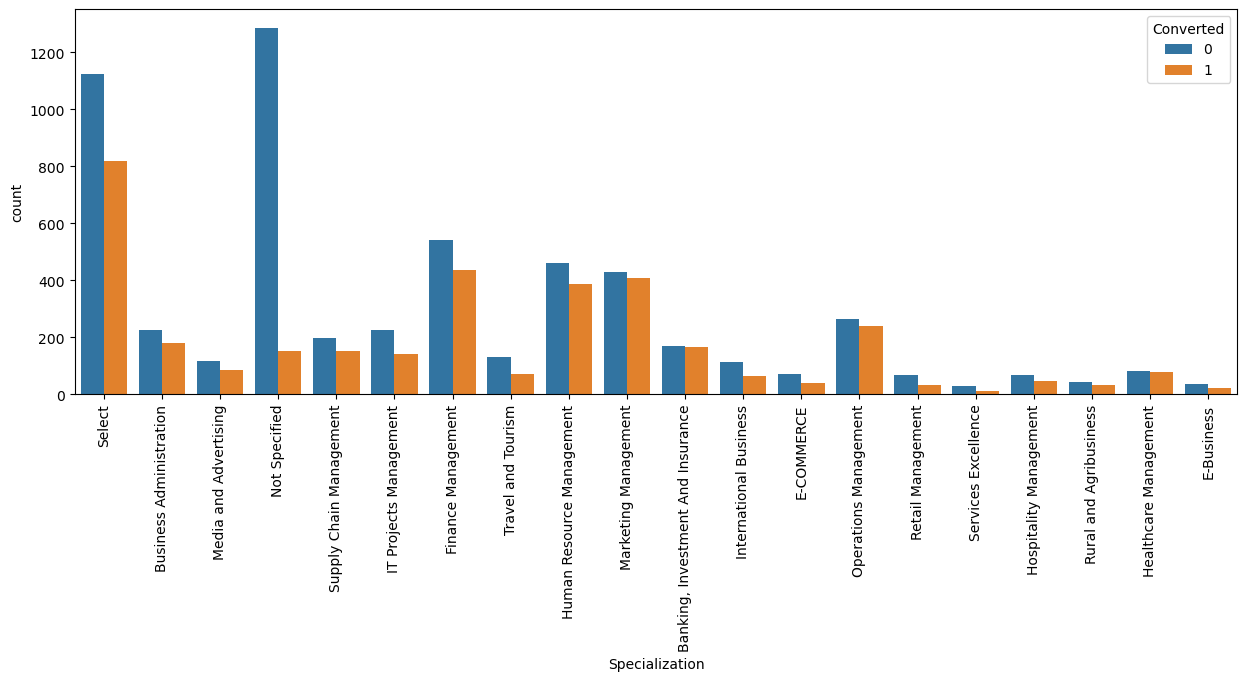

In [32]:
plt.figure(figsize=(15,5))
s1=sns.countplot(lead_scoring.Specialization, hue=lead_scoring.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [34]:
#combining Management Specializations because they show similar trends

lead_scoring['Specialization'] = lead_scoring['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations') 

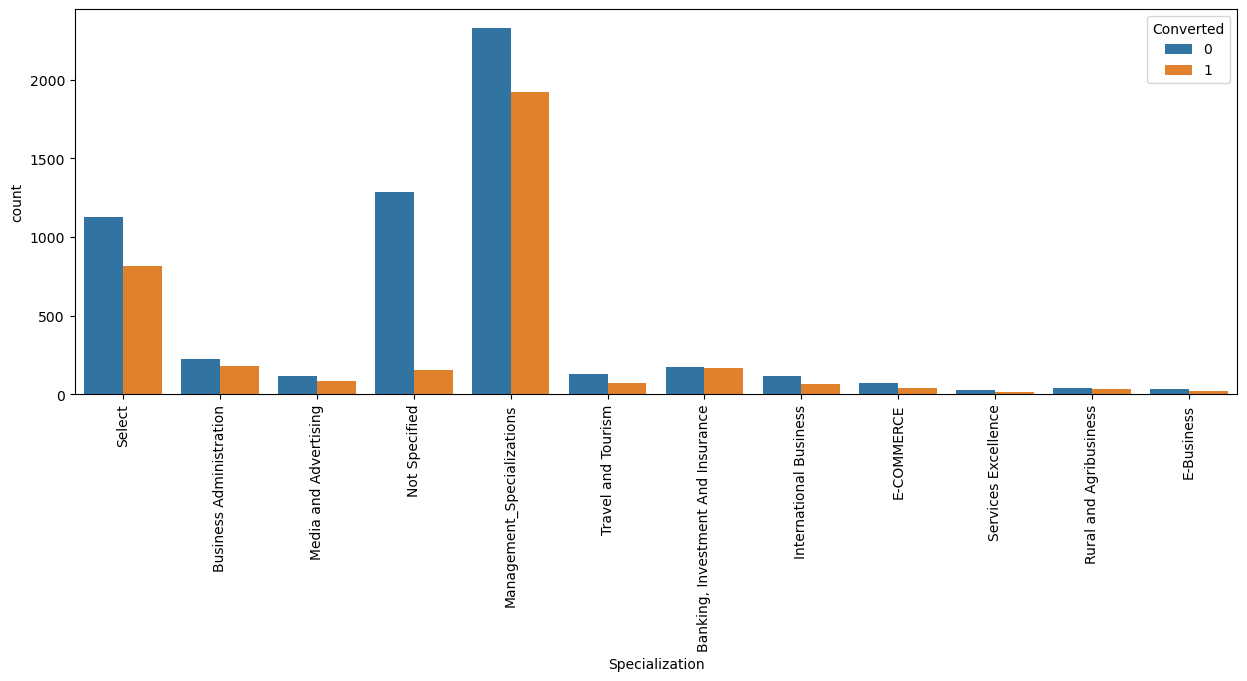

In [35]:
#visualizing count of Variable based on Converted value


plt.figure(figsize=(15,5))
s1=sns.countplot(lead_scoring.Specialization, hue=lead_scoring.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [36]:
#What is your current occupation

lead_scoring['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [37]:
#imputing Nan values with mode "Unemployed"

lead_scoring['What is your current occupation'] = lead_scoring['What is your current occupation'].replace(np.nan, 'Unemployed')

In [38]:
#checking count of values
lead_scoring['What is your current occupation'].value_counts(dropna=False)

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

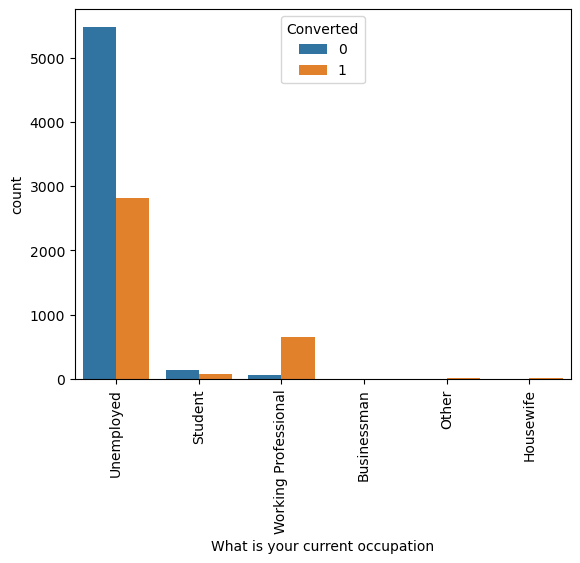

In [39]:
#visualizing count of Variable based on Converted value

s1=sns.countplot(lead_scoring['What is your current occupation'], hue=lead_scoring.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [40]:
#checking value counts of variable
lead_scoring['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [41]:
cols_to_drop.append('What matters most to you in choosing a course')
cols_to_drop

['Country', 'What matters most to you in choosing a course']

In [42]:
#checking value counts of Tag variable
lead_scoring['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [43]:
#replacing Nan values with "Not Specified"
lead_scoring['Tags'] = lead_scoring['Tags'].replace(np.nan,'Not Specified')

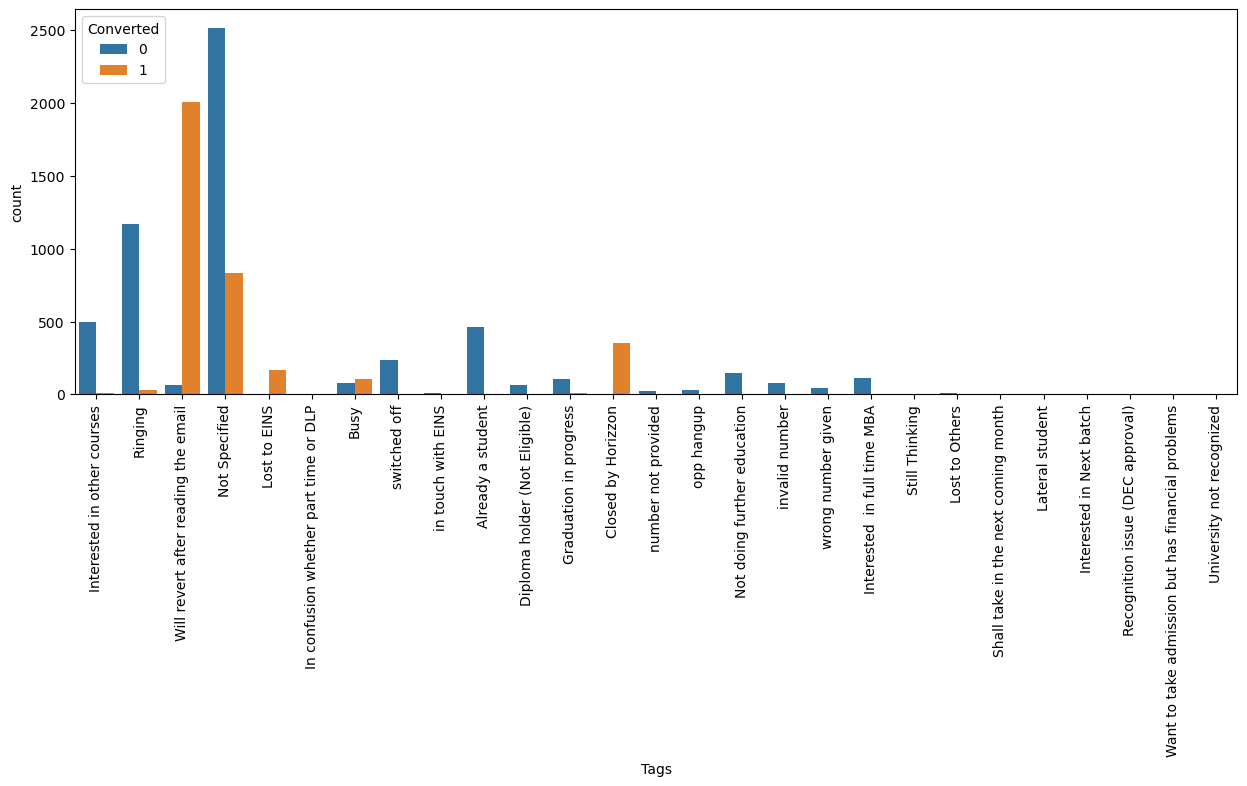

In [44]:
plt.figure(figsize=(15,5))
s1=sns.countplot(lead_scoring['Tags'], hue=lead_scoring.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [45]:
#replacing tags with low frequency with "Other Tags"
lead_scoring['Tags'] = lead_scoring['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

lead_scoring['Tags'] = lead_scoring['Tags'].replace(['switched off',
                                      'Already a student',
                                       'Not doing further education',
                                       'invalid number',
                                       'wrong number given',
                                       'Interested  in full time MBA'] , 'Other_Tags')

In [46]:
#checking percentage of missing values
round(100*(lead_scoring.isnull().sum()/len(lead_scoring.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
Specialization                                    0.00
How did you hear about X Education               23.89
What is your current occupation                   0.00
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [47]:
lead_scoring['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [48]:
#replacing Nan Values and combining low frequency values
lead_scoring['Lead Source'] = lead_scoring['Lead Source'].replace(np.nan,'Others')
lead_scoring['Lead Source'] = lead_scoring['Lead Source'].replace('google','Google')
lead_scoring['Lead Source'] = lead_scoring['Lead Source'].replace('Facebook','Social Media')
lead_scoring['Lead Source'] = lead_scoring['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others') 

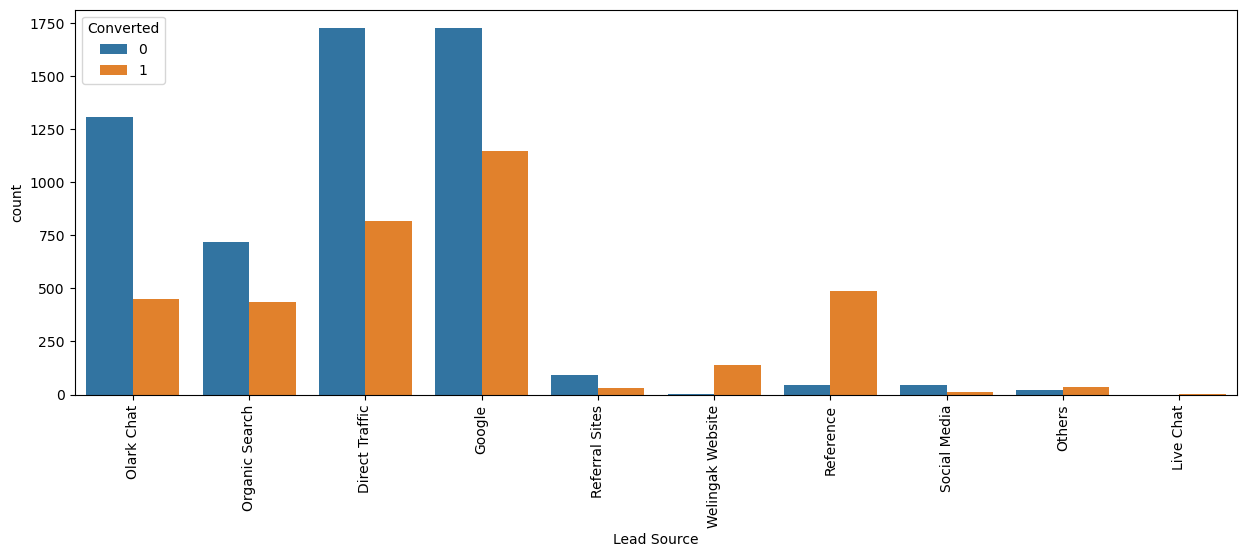

In [49]:
#visualizing count of Variable based on Converted value
plt.figure(figsize=(15,5))
s1=sns.countplot(lead_scoring['Lead Source'], hue=lead_scoring.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [50]:
lead_scoring['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [51]:
lead_scoring['Last Activity'] = lead_scoring['Last Activity'].replace(np.nan,'Others')
lead_scoring['Last Activity'] = lead_scoring['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

In [52]:
lead_scoring['Last Activity'].value_counts(dropna=False)

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: Last Activity, dtype: int64

In [53]:
#Check the Null Values in All Columns:
round(100*(lead_scoring.isnull().sum()/len(lead_scoring.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     0.00
Country                                           0.00
Specialization                                    0.00
How did you hear about X Education               23.89
What is your current occupation                   0.00
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [54]:
#Drop all rows which have Nan Values. Since the number of Dropped rows is less than 2%, it will not affect the model
lead_scoring = lead_scoring.dropna()

In [55]:
#Checking percentage of Null Values in All Columns:
round(100*(lead_scoring.isnull().sum()/len(lead_scoring.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
How did you hear about X Education               0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                     

In [56]:
#Lead Origin
lead_scoring['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    3625
API                        2140
Lead Add Form               608
Lead Import                  28
Name: Lead Origin, dtype: int64

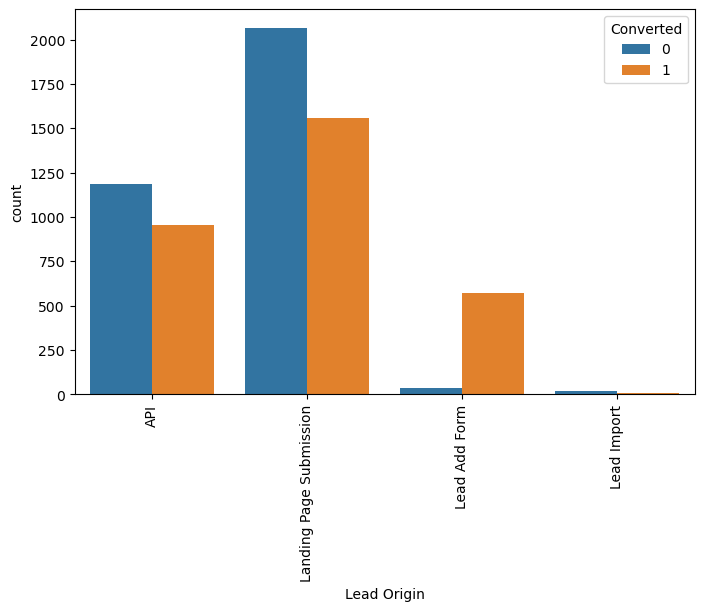

In [57]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(8,5))
s1=sns.countplot(lead_scoring['Lead Origin'], hue=lead_scoring.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

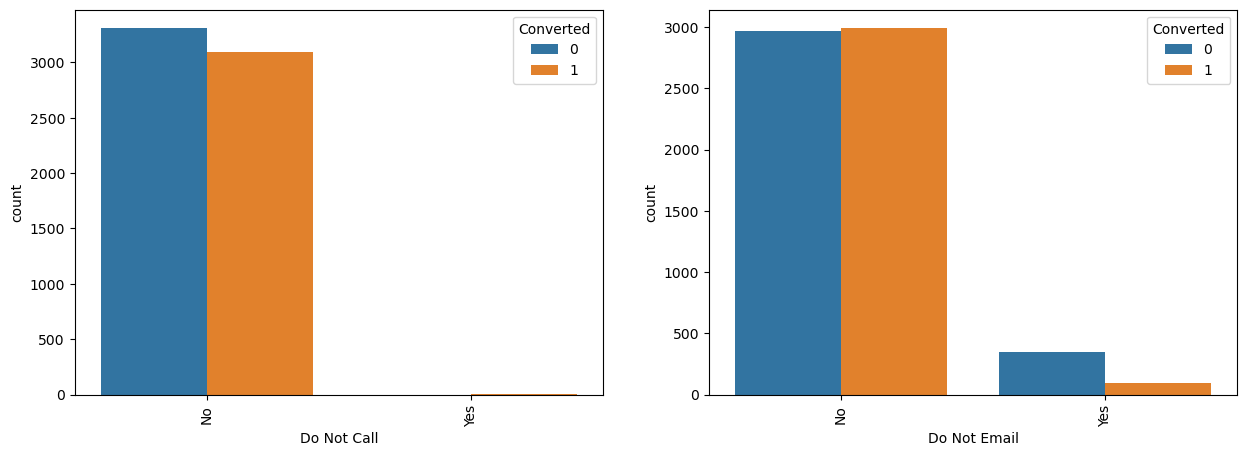

In [58]:
plt.figure(figsize=(15,5))

ax1=plt.subplot(1, 2, 1)
ax1=sns.countplot(lead_scoring['Do Not Call'], hue=lead_scoring.Converted)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)

ax2=plt.subplot(1, 2, 2)
ax2=sns.countplot(lead_scoring['Do Not Email'], hue=lead_scoring.Converted)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
plt.show()

In [59]:
#checking value counts for Do Not Call
lead_scoring['Do Not Call'].value_counts(dropna=False)

No     6399
Yes       2
Name: Do Not Call, dtype: int64

In [60]:
lead_scoring['Do Not Email'].value_counts(dropna=False)

No     5959
Yes     442
Name: Do Not Email, dtype: int64

In [61]:
cols_to_drop.append('Do Not Call')
cols_to_drop

['Country', 'What matters most to you in choosing a course', 'Do Not Call']

In [62]:
lead_scoring.Search.value_counts(dropna=False)

No     6391
Yes      10
Name: Search, dtype: int64

In [63]:
lead_scoring.Magazine.value_counts(dropna=False)

No    6401
Name: Magazine, dtype: int64

In [64]:
lead_scoring['Newspaper Article'].value_counts(dropna=False)

No     6400
Yes       1
Name: Newspaper Article, dtype: int64

In [65]:
lead_scoring['X Education Forums'].value_counts(dropna=False)

No    6401
Name: X Education Forums, dtype: int64

In [66]:
lead_scoring['Newspaper'].value_counts(dropna=False)

No     6400
Yes       1
Name: Newspaper, dtype: int64

In [67]:
lead_scoring['Digital Advertisement'].value_counts(dropna=False)

No     6398
Yes       3
Name: Digital Advertisement, dtype: int64

In [68]:
lead_scoring['Through Recommendations'].value_counts(dropna=False)

No     6395
Yes       6
Name: Through Recommendations, dtype: int64

In [69]:
lead_scoring['Receive More Updates About Our Courses'].value_counts(dropna=False)

No    6401
Name: Receive More Updates About Our Courses, dtype: int64

In [70]:
lead_scoring['Update me on Supply Chain Content'].value_counts(dropna=False)

No    6401
Name: Update me on Supply Chain Content, dtype: int64

In [71]:
lead_scoring['Get updates on DM Content'].value_counts(dropna=False)

No    6401
Name: Get updates on DM Content, dtype: int64

In [73]:
lead_scoring['I agree to pay the amount through cheque'].value_counts(dropna=False)

No    6401
Name: I agree to pay the amount through cheque, dtype: int64

In [74]:
lead_scoring['A free copy of Mastering The Interview'].value_counts(dropna=False)

No     4230
Yes    2171
Name: A free copy of Mastering The Interview, dtype: int64

In [75]:
#adding imbalanced columns to the list of columns to be dropped

cols_to_drop.extend(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque'])

In [76]:
lead_scoring['Last Notable Activity'].value_counts()

Email Opened                    2042
Modified                        1950
SMS Sent                        1889
Page Visited on Website          212
Email Link Clicked               110
Olark Chat Conversation           76
Email Bounced                     49
Unsubscribed                      33
Unreachable                       22
Had a Phone Conversation          13
Email Marked Spam                  2
Approached upfront                 1
View in browser link Clicked       1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [77]:
#clubbing lower frequency values

lead_scoring['Last Notable Activity'] = lead_scoring['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Other_Notable_activity')

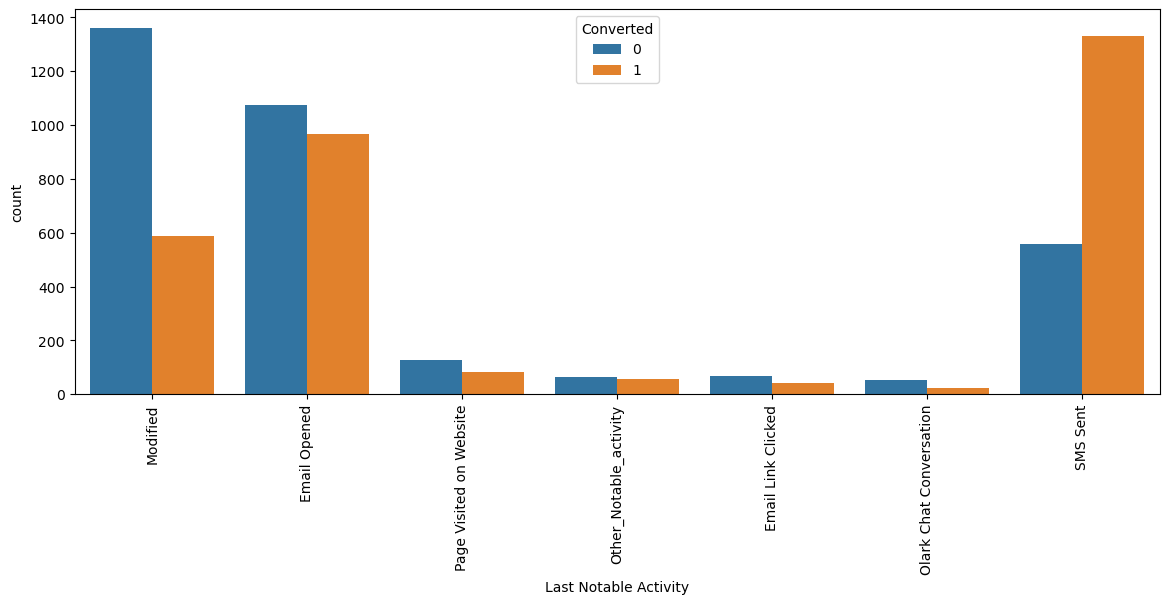

In [78]:
#visualizing count of Variable based on Converted value

plt.figure(figsize = (14,5))
ax1=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = lead_scoring)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

In [79]:
lead_scoring['Last Notable Activity'].value_counts()

Email Opened               2042
Modified                   1950
SMS Sent                   1889
Page Visited on Website     212
Other_Notable_activity      122
Email Link Clicked          110
Olark Chat Conversation      76
Name: Last Notable Activity, dtype: int64

In [80]:
#list of columns to be dropped
cols_to_drop

['Country',
 'What matters most to you in choosing a course',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [81]:
#dropping columns
lead_scoring = lead_scoring.drop(cols_to_drop,1)
lead_scoring.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6401 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             6401 non-null   object 
 1   Lead Source                             6401 non-null   object 
 2   Do Not Email                            6401 non-null   object 
 3   Converted                               6401 non-null   int64  
 4   TotalVisits                             6401 non-null   float64
 5   Total Time Spent on Website             6401 non-null   int64  
 6   Page Views Per Visit                    6401 non-null   float64
 7   Last Activity                           6401 non-null   object 
 8   Specialization                          6401 non-null   object 
 9   How did you hear about X Education      6401 non-null   object 
 10  What is your current occupation         6401 non-null   obje

In [82]:
# Numeric Attributes Analysis

#Check the % of Data that has Converted Values = 1:

Converted = (sum(lead_scoring['Converted'])/len(lead_scoring['Converted'].index))*100
Converted

48.28932979221997

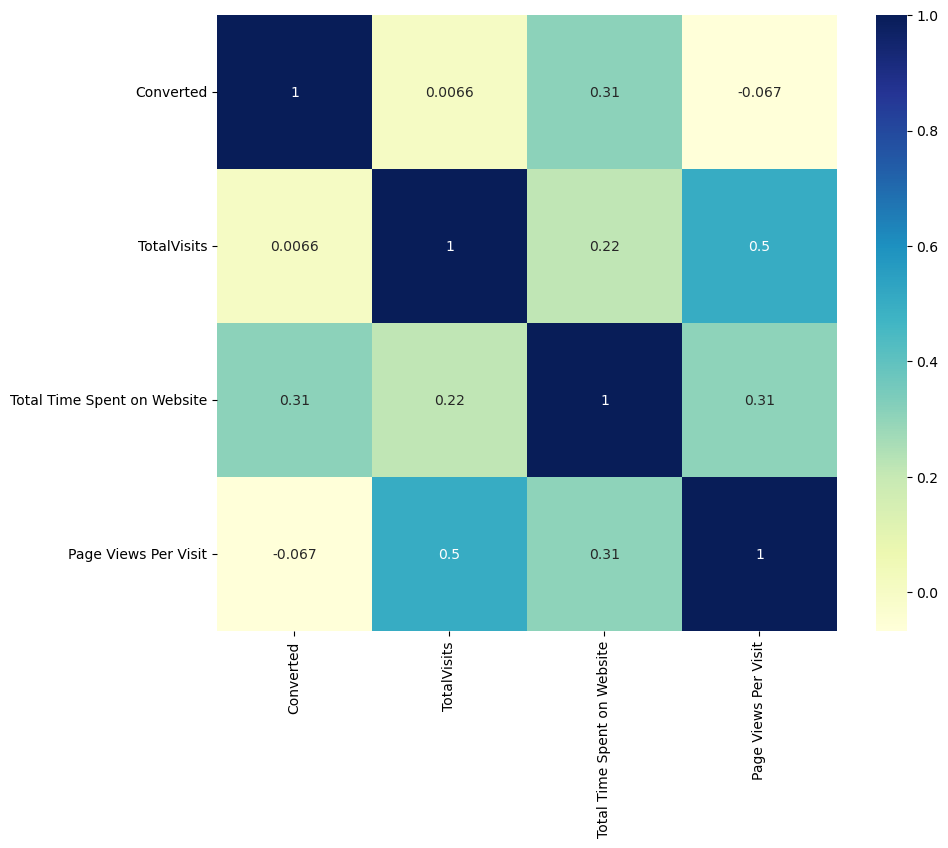

In [84]:
#Checking correlations of numeric values
# figure size
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(lead_scoring.corr(), cmap="YlGnBu", annot=True)
plt.show()

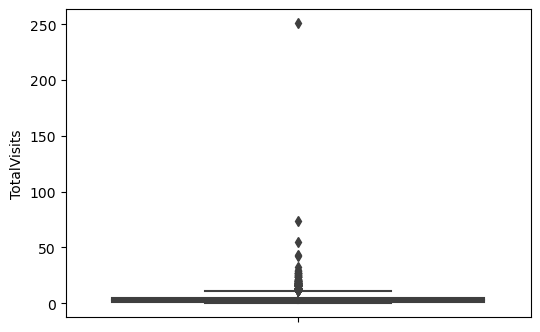

In [85]:
#Total Visits
#visualizing spread of variable

plt.figure(figsize=(6,4))
sns.boxplot(y=lead_scoring['TotalVisits'])
plt.show()

In [86]:

lead_scoring['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    6401.000000
mean        3.590689
std         4.847158
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

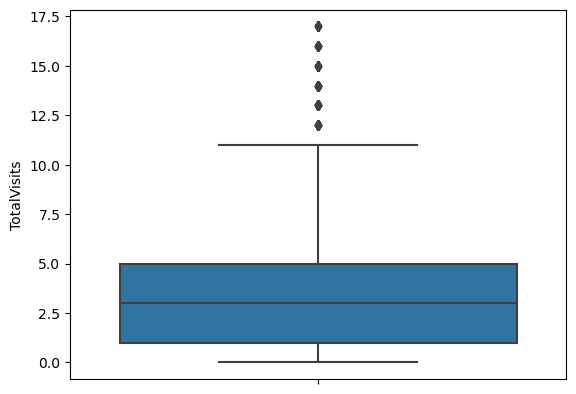

In [87]:
#Outlier Treatment: Remove top & bottom 1% of the Column Outlier values

Q3 = lead_scoring.TotalVisits.quantile(0.99)
lead_scoring = lead_scoring[(lead_scoring.TotalVisits <= Q3)]
Q1 = lead_scoring.TotalVisits.quantile(0.01)
lead_scoring = lead_scoring[(lead_scoring.TotalVisits >= Q1)]
sns.boxplot(y=lead_scoring['TotalVisits'])
plt.show()

In [88]:
lead_scoring.shape

(6337, 16)

In [89]:
lead_scoring['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    6337.000000
mean      531.306770
std       564.904125
min         0.000000
5%          0.000000
25%        30.000000
50%       282.000000
75%      1019.000000
90%      1424.000000
95%      1591.000000
99%      1848.280000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

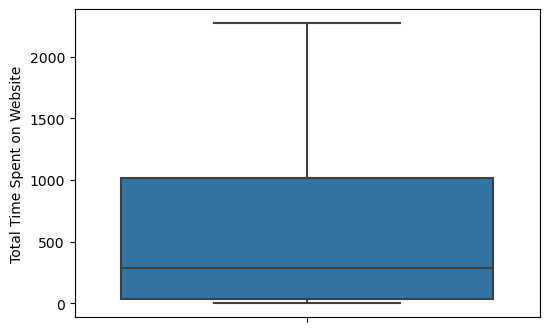

In [90]:
#visualizing spread of numeric variable

plt.figure(figsize=(6,4))
sns.boxplot(y=lead_scoring['Total Time Spent on Website'])
plt.show()

In [91]:
lead_scoring['Page Views Per Visit'].describe()

count    6337.000000
mean        2.442031
std         2.047087
min         0.000000
25%         1.000000
50%         2.000000
75%         3.500000
max        16.000000
Name: Page Views Per Visit, dtype: float64

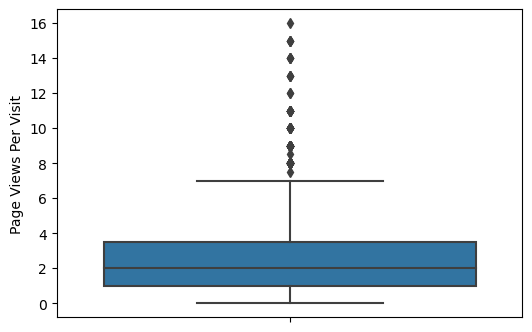

In [92]:
#visualizing spread of numeric variable

plt.figure(figsize=(6,4))
sns.boxplot(y=lead_scoring['Page Views Per Visit'])
plt.show()

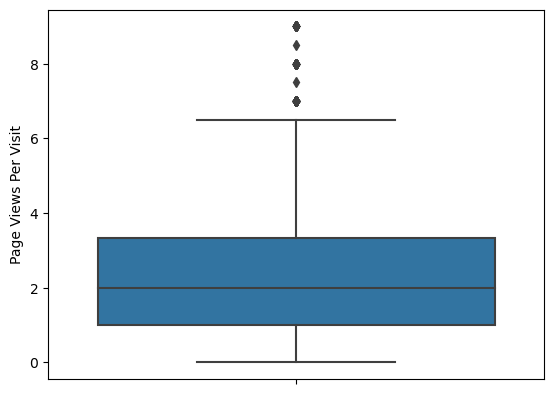

In [93]:
Q3 = lead_scoring['Page Views Per Visit'].quantile(0.99)
lead_scoring = lead_scoring[lead_scoring['Page Views Per Visit'] <= Q3]
Q1 = lead_scoring['Page Views Per Visit'].quantile(0.01)
lead_scoring = lead_scoring[lead_scoring['Page Views Per Visit'] >= Q1]
sns.boxplot(y=lead_scoring['Page Views Per Visit'])
plt.show()

In [94]:
lead_scoring.shape

(6292, 16)

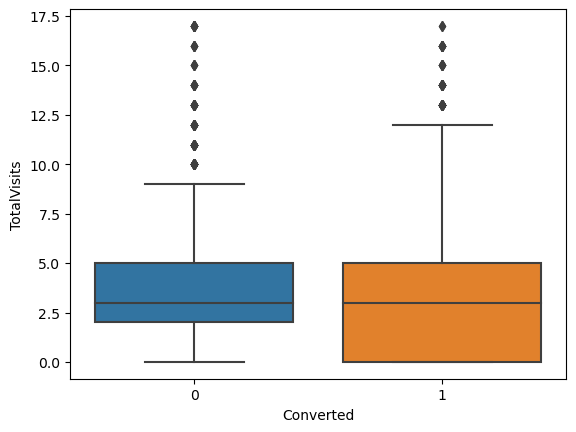

In [95]:
#checking Spread of "Total Visits" vs Converted variable
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead_scoring)
plt.show()

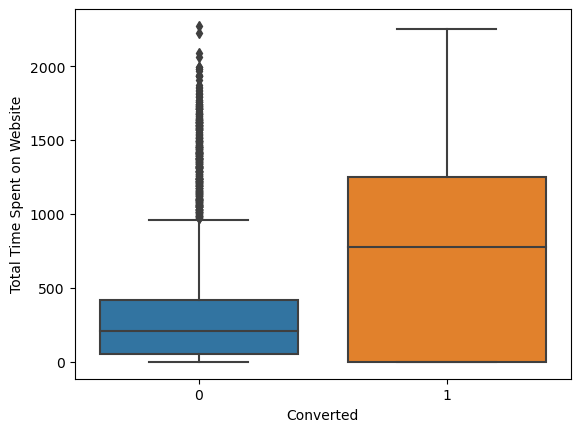

In [97]:
#checking Spread of "Total Time Spent on Website" vs Converted variable

sns.boxplot(x=lead_scoring.Converted, y=lead_scoring['Total Time Spent on Website'])
plt.show()

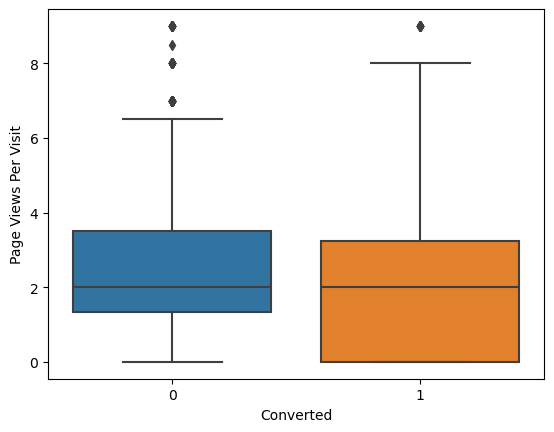

In [98]:
sns.boxplot(x=lead_scoring.Converted,y=lead_scoring['Page Views Per Visit'])
plt.show()

In [99]:
round(100*(lead_scoring.isnull().sum()/len(lead_scoring.index)),2)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
How did you hear about X Education        0.0
What is your current occupation           0.0
Tags                                      0.0
Lead Profile                              0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [101]:
# Dummy Variables Creation

#getting a list of categorical columns

cat_cols= lead_scoring.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'How did you hear about X Education',
       'What is your current occupation', 'Tags', 'Lead Profile', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [102]:
# List of variables to map

varlist =  ['A free copy of Mastering The Interview','Do Not Email']

In [103]:
# List of variables to map

varlist =  ['A free copy of Mastering The Interview','Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
lead_scoring[varlist] = lead_scoring[varlist].apply(binary_map)

In [109]:
#getting dummies and dropping the first column and adding the results to the master dataframe
dummy = pd.get_dummies(lead_scoring[['Lead Origin','What is your current occupation',
                             'City']], drop_first=True)

lead_scoring = pd.concat([lead_scoring,dummy],1)

In [114]:
dummy = pd.get_dummies(lead_scoring['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], 1)
lead_scoring = pd.concat([lead_scoring, dummy], axis = 1)

In [115]:
dummy = pd.get_dummies(lead_scoring['Last Activity'], prefix  = 'Last Activity')
dummy = dummy.drop(['Last Activity_Others'], 1)
lead_scoring = pd.concat([lead_scoring, dummy], axis = 1)

In [116]:
dummy = pd.get_dummies(lead_scoring['Last Notable Activity'], prefix  = 'Last Notable Activity')
dummy = dummy.drop(['Last Notable Activity_Other_Notable_activity'], 1)
lead_scoring = pd.concat([lead_scoring, dummy], axis = 1)

In [117]:
dummy = pd.get_dummies(lead_scoring['Tags'], prefix  = 'Tags')
dummy = dummy.drop(['Tags_Not Specified'], 1)
lead_scoring = pd.concat([lead_scoring, dummy], axis = 1)

In [118]:
lead_scoring.drop(cat_cols,1,inplace = True)

In [119]:
lead_scoring.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,2.0,1532,2.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [120]:
from sklearn.model_selection import train_test_split

# Putting response variable to y
y = lead_scoring['Converted']

y.head()

X=lead_scoring.drop('Converted', axis=1)

In [121]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [122]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4404 entries, 8321 to 8327
Columns: 120 entries, TotalVisits to Tags_Will revert after reading the email
dtypes: float64(2), int64(1), uint8(117)
memory usage: 640.8 KB


In [123]:
#scaling numeric columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
8321,-1.127146,-0.936479,-1.261670,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1612,-0.090037,1.661471,0.327204,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
6159,-0.090037,-0.872376,0.327204,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
8384,-1.127146,-0.936479,-1.261670,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
5291,-0.090037,1.355201,-0.467233,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1


In [124]:
import statsmodels.api as sm

In [131]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg)            
rfe = rfe.fit(X_train, y_train)

In [132]:
rfe.support_

array([ True,  True,  True, False,  True,  True, False, False,  True,
        True, False, False, False, False, False,  True, False,  True,
        True,  True, False, False,  True,  True, False, False, False,
       False, False, False,  True,  True,  True,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False,  True, False, False, False,  True,  True, False,  True,
       False, False, False, False, False, False,  True, False, False,
       False, False,  True, False, False, False, False, False, False,
       False,  True,  True, False,  True,  True,  True,  True, False,
        True, False,  True,  True, False,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True, False,  True,
       False,  True, False, False,  True,  True,  True,  True, False,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True])

In [133]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', False, 6),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('What is your current occupation_Housewife', False, 13),
 ('What is your current occupation_Other', False, 41),
 ('What is your current occupation_Student', True, 1),
 ('What is your current occupation_Unemployed', True, 1),
 ('What is your current occupation_Working Professional', False, 45),
 ('City_Other Cities', False, 33),
 ('City_Other Cities of Maharashtra', False, 24),
 ('City_Other Metro Cities', False, 58),
 ('City_Select', False, 51),
 ('City_Thane & Outskirts', True, 1),
 ('City_Tier II Cities', False, 30),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('What is your current occupation_Housewife', False, 26),
 ('What is your current occupation_Other', Fa

In [134]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed', 'City_Thane & Outskirts',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'What is your current occupation_Student',
       'What is your current occupation_Unemployed', 'City_Tier II Cities',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'What is your current occupation_Unemployed',
       'Lead Origin_Lead Add Form', 'What is your current occupation_Student',
       'What is your current occupation_Unemployed', 'City_Other Cities',
       'Lead Origin_Lead Add Form',
       'What is your current occupation_Unemployed',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_O

In [135]:
X_train.columns[~rfe.support_]

Index(['Lead Origin_Landing Page Submission',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Working Professional',
       'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities', 'City_Select', 'City_Tier II Cities',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Working Professional',
       'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities', 'City_Select', 'City_Thane & Outskirts',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Working Professional',
       'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities', 'City_Select', 'City_Thane & Outskirts',
 

In [136]:
#BUILDING MODEL #1

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4404
Model:                            GLM   Df Residuals:                     4368
Model Family:                Binomial   Df Model:                           35
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -623.79
Date:                Tue, 20 Jun 2023   Deviance:                       1247.6
Time:                        13:18:03   Pearson chi2:                 5.44e+03
No. Iterations:                    16   Pseudo R-squ. (CS):             0.6678
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             4.1359      1.356      3.049      0.002       1.477       6.794
TotalVisits                                       0.3616      0.123      2.947      0.003       0.121       0.602
Total Time Spent on Website                       1.0753      0.093     11.521      0.000       0.892       1.258
Page Views Per Visit                             -0.2221      0.131     -1.701      0.089      -0.478       0.034
Lead Origin_Lead Add Form                        -0.0067      0.053     -0.126      0.900      -0.111       0.098
Lead Origin_Lead Add Form                        -0.0067      0.053     -0.126      0.900      -0.111       0.098
Lead Origin_Lead Add Form                        -0.0067      0.053     -0.126      0.900      -0.111       0.098
Lead Origin_Lead Add Form                        -0.0067      0.053     -0.126      0.900      -0.111       0.098
Lead Origin_Lead Add Form                        -0.0067      0.053     -0.126      0.900      -0.111       0.098
Lead Origin_Lead Import                          -0.1916      0.096     -2.005      0.045      -0.379      -0.004
Lead Origin_Lead Import                          -0.1916      0.096     -2.005      0.045      -0.379      -0.004
Lead Origin_Lead Import                          -0.1916      0.096     -2.005      0.045      -0.379      -0.004
Lead Origin_Lead Import                          -0.1916      0.096     -2.005      0.045      -0.379      -0.004
Lead Origin_Lead Import                          -0.1916      0.096     -2.005      0.045      -0.379      -0.004
What is your current occupation_Student          -0.0316      0.048     -0.658      0.510      -0.126       0.062
What is your current occupation_Student          -0.0316      0.048     -0.658      0.510      -0.126       0.062
What is your current occupation_Student          -0.0316      0.048     -0.658      0.510      -0.126       0.062
What is your current occupation_Student          -0.0316      0.048     -0.658      0.510      -0.126       0.062
What is your current occupation_Student          -0.0316      0.048     -0.658      0.510      -0.126       0.062
What is your current occupation_Unemployed       -0.0474      0.016     -2.876      0.004      -0.080      -0.015
What is your current occupation_Unemployed       -0.0474      0.016     -2.876      0.004      -0.080      -0.015
What is your current occupation_Unemployed       -0.0474      0.016     -2.876      0.004      -0.080      -0.015
What is your current occupation_Unemployed       -0.0474      0.016     -2.876      0.004      -0.080      -0.015
What is your current occupation_Unemployed       -0.0474      0.016     -2.876      0.004      -0.080      -0.015
City_

In [137]:
#dropping column with high p-value

col = col.drop('Lead Source_Referral Sites',1)

In [138]:
#BUILDING MODEL #2

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4404
Model:                            GLM   Df Residuals:                     4369
Model Family:                Binomial   Df Model:                           34
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -626.53
Date:                Tue, 20 Jun 2023   Deviance:                       1253.1
Time:                        13:19:03   Pearson chi2:                 4.69e+03
No. Iterations:                   100   Pseudo R-squ. (CS):             0.6674
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             1.3909      0.903      1.541      0.123      -0.378       3.160
TotalVisits                                       0.3385      0.120      2.826      0.005       0.104       0.573
Total Time Spent on Website                       1.0285      0.096     10.738      0.000       0.841       1.216
Page Views Per Visit                             -0.2172      0.132     -1.649      0.099      -0.475       0.041
Lead Origin_Lead Add Form                         0.0722      0.057      1.271      0.204      -0.039       0.184
Lead Origin_Lead Add Form                         0.0722      0.057      1.271      0.204      -0.039       0.184
Lead Origin_Lead Add Form                         0.0722      0.057      1.271      0.204      -0.039       0.184
Lead Origin_Lead Add Form                         0.0722      0.057      1.271      0.204      -0.039       0.184
Lead Origin_Lead Add Form                         0.0722      0.057      1.271      0.204      -0.039       0.184
Lead Origin_Lead Import                          -0.0118      0.069     -0.172      0.863      -0.146       0.123
Lead Origin_Lead Import                          -0.0118      0.069     -0.172      0.863      -0.146       0.123
Lead Origin_Lead Import                          -0.0118      0.069     -0.172      0.863      -0.146       0.123
Lead Origin_Lead Import                          -0.0118      0.069     -0.172      0.863      -0.146       0.123
Lead Origin_Lead Import                          -0.0118      0.069     -0.172      0.863      -0.146       0.123
What is your current occupation_Student          -0.0318      0.046     -0.691      0.489      -0.122       0.058
What is your current occupation_Student          -0.0318      0.046     -0.691      0.489      -0.122       0.058
What is your current occupation_Student          -0.0318      0.046     -0.691      0.489      -0.122       0.058
What is your current occupation_Student          -0.0318      0.046     -0.691      0.489      -0.122       0.058
What is your current occupation_Student          -0.0318      0.046     -0.691      0.489      -0.122       0.058
What is your current occupation_Unemployed       -0.0468      0.016     -2.851      0.004      -0.079      -0.015
What is your current occupation_Unemployed       -0.0468      0.016     -2.851      0.004      -0.079      -0.015
What is your current occupation_Unemployed       -0.0468      0.016     -2.851      0.004      -0.079      -0.015
What is your current occupation_Unemployed       -0.0468      0.016     -2.851      0.004      -0.079      -0.015
What is your current occupation_Unemployed       -0.0468      0.016     -2.851      0.004      -0.079      -0.015
City_

In [139]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [140]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
82,Lead Origin_Lead Add Form,inf
106,What is your current occupation_Unemployed,inf
99,Lead Origin_Lead Add Form,inf
100,Lead Origin_Lead Add Form,inf
101,Lead Origin_Lead Add Form,inf
...,...,...
159,Tags_Closed by Horizzon,1.69
1,Total Time Spent on Website,1.53
156,Last Notable Activity_Olark Chat Conversation,1.48
158,Tags_Busy,1.33


In [141]:
#dropping variable with high VIF

col = col.drop('Last Notable Activity_SMS Sent',1)

In [142]:
#BUILDING MODEL #3
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4404
Model:                            GLM   Df Residuals:                     4370
Model Family:                Binomial   Df Model:                           33
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 20 Jun 2023   Deviance:                       26802.
Time:                        14:26:44   Pearson chi2:                 1.31e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                          3.597e+14   1.05e+07   3.43e+07      0.000     3.6e+14     3.6e+14
TotalVisits                                    5.874e+13   1.55e+06   3.79e+07      0.000    5.87e+13    5.87e+13
Total Time Spent on Website                    2.509e+14   1.19e+06   2.11e+08      0.000    2.51e+14    2.51e+14
Page Views Per Visit                           4.192e+13   1.66e+06   2.53e+07      0.000    4.19e+13    4.19e+13
Lead Origin_Lead Add Form                      3.084e+13   6.57e+05   4.69e+07      0.000    3.08e+13    3.08e+13
Lead Origin_Lead Add Form                      3.084e+13   6.57e+05   4.69e+07      0.000    3.08e+13    3.08e+13
Lead Origin_Lead Add Form                      3.084e+13   6.57e+05   4.69e+07      0.000    3.08e+13    3.08e+13
Lead Origin_Lead Add Form                      3.084e+13   6.57e+05   4.69e+07      0.000    3.08e+13    3.08e+13
Lead Origin_Lead Add Form                      3.084e+13   6.57e+05   4.69e+07      0.000    3.08e+13    3.08e+13
Lead Origin_Lead Import                       -2.032e+13   1.16e+06  -1.76e+07      0.000   -2.03e+13   -2.03e+13
Lead Origin_Lead Import                       -2.032e+13   1.16e+06  -1.76e+07      0.000   -2.03e+13   -2.03e+13
Lead Origin_Lead Import                       -2.032e+13   1.16e+06  -1.76e+07      0.000   -2.03e+13   -2.03e+13
Lead Origin_Lead Import                       -2.032e+13   1.16e+06  -1.76e+07      0.000   -2.03e+13   -2.03e+13
Lead Origin_Lead Import                       -2.032e+13   1.16e+06  -1.76e+07      0.000   -2.03e+13   -2.03e+13
What is your current occupation_Student       -1.288e+13   4.47e+05  -2.88e+07      0.000   -1.29e+13   -1.29e+13
What is your current occupation_Student       -1.288e+13   4.47e+05  -2.88e+07      0.000   -1.29e+13   -1.29e+13
What is your current occupation_Student       -1.288e+13   4.47e+05  -2.88e+07      0.000   -1.29e+13   -1.29e+13
What is your current occupation_Student       -1.288e+13   4.47e+05  -2.88e+07      0.000   -1.29e+13   -1.29e+13
What is your current occupation_Student       -1.288e+13   4.47e+05  -2.88e+07      0.000   -1.29e+13   -1.29e+13
What is your current occupation_Unemployed    -9.717e+12   1.42e+05  -6.85e+07      0.000   -9.72e+12   -9.72e+12
What is your current occupation_Unemployed    -9.717e+12   1.42e+05  -6.85e+07      0.000   -9.72e+12   -9.72e+12
What is your current occupation_Unemployed    -9.717e+12   1.42e+05  -6.85e+07      0.000   -9.72e+12   -9.72e+12
What is your current occupation_Unemployed    -9.717e+12   1.42e+05  -6.85e+07      0.000   -9.72e+12   -9.72e+12
What is your current occupation_Unemployed    -9.717e+12   1.42e+05  -6.85e+07      0.000   -9.72e+12   -9.72e+12
City_

In [143]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
82,Lead Origin_Lead Add Form,inf
104,What is your current occupation_Unemployed,inf
97,City_Other Cities,inf
98,Lead Origin_Lead Add Form,inf
99,Lead Origin_Lead Add Form,inf
...,...,...
158,Tags_Closed by Horizzon,1.69
1,Total Time Spent on Website,1.53
156,Last Notable Activity_Olark Chat Conversation,1.36
157,Tags_Busy,1.33


In [144]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

8321    1.0
1612    1.0
6159    0.0
8384    1.0
5291    1.0
7998    0.0
1495    0.0
5817    1.0
3307    1.0
4675    1.0
dtype: float64

In [145]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([1., 1., 0., 1., 1., 0., 0., 1., 1., 1.])

In [146]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,1.0,8321
1,1,1.0,1612
2,0,0.0,6159
3,1,1.0,8384
4,1,1.0,5291


In [147]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)


In [148]:
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,1,1.0,8321,1
1,1,1.0,1612,1
2,0,0.0,6159,0
3,1,1.0,8384,1
4,1,1.0,5291,1


In [149]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[2128  147]
 [ 144 1985]]


In [150]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9339237057220708


In [151]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [152]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9323626115547206

In [153]:
# Let us calculate specificity
TN / float(TN+FP)

0.9353846153846154

In [154]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.06461538461538462


In [155]:
# positive predictive value 
print (TP / float(TP+FP))

0.9310506566604128


In [156]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9366197183098591


In [158]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [159]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

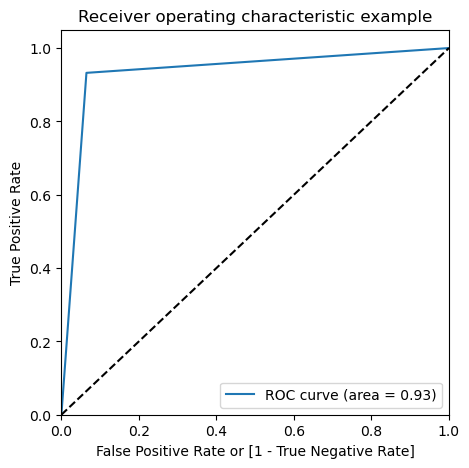

In [160]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [161]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,1.0,8321,1,1,1,1,1,1,1,1,1,1,1
1,1,1.0,1612,1,1,1,1,1,1,1,1,1,1,1
2,0,0.0,6159,0,0,0,0,0,0,0,0,0,0,0
3,1,1.0,8384,1,1,1,1,1,1,1,1,1,1,1
4,1,1.0,5291,1,1,1,1,1,1,1,1,1,1,1


In [163]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.933924  0.932363  0.935385
0.1   0.1  0.933924  0.932363  0.935385
0.2   0.2  0.933924  0.932363  0.935385
0.3   0.3  0.933924  0.932363  0.935385
0.4   0.4  0.933924  0.932363  0.935385
0.5   0.5  0.933924  0.932363  0.935385
0.6   0.6  0.933924  0.932363  0.935385
0.7   0.7  0.933924  0.932363  0.935385
0.8   0.8  0.933924  0.932363  0.935385
0.9   0.9  0.933924  0.932363  0.935385


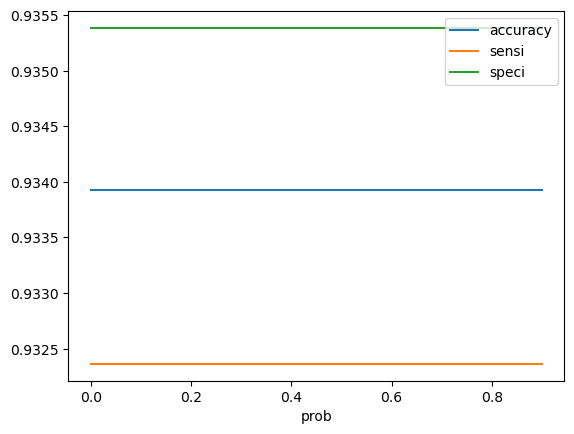

In [164]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [165]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,1,1.0,8321,1,1,1,1,1,1,1,1,1,1,1,1
1,1,1.0,1612,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.0,6159,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1.0,8384,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1.0,5291,1,1,1,1,1,1,1,1,1,1,1,1


In [166]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,1,1.0,8321,1,100
1,1,1.0,1612,1,100
2,0,0.0,6159,0,0
3,1,1.0,8384,1,100
4,1,1.0,5291,1,100


In [167]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9339237057220708

In [168]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[2128,  147],
       [ 144, 1985]], dtype=int64)

In [169]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [170]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9323626115547206

In [171]:
# Let us calculate specificity
TN / float(TN+FP)

0.9353846153846154

In [172]:
from sklearn.metrics import precision_recall_curve

In [173]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

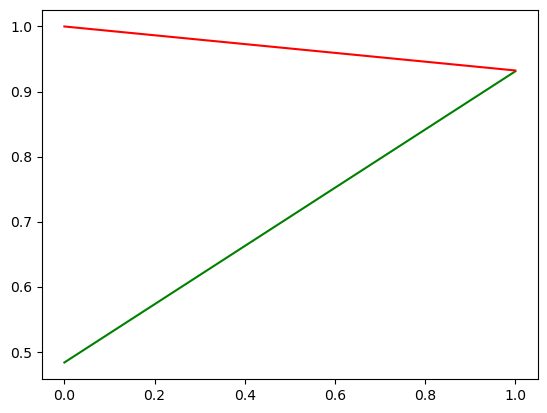

In [174]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [175]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
6187,0.212193,0.943777,0.855715,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
8295,-1.109985,-0.940140,-1.235636,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
185,0.542737,2.277199,1.378552,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
162,-0.448896,-0.858002,-0.189961,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
7565,-0.448896,-0.499743,-0.712798,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [176]:
X_test = X_test[col]
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Origin_Lead Add Form,Lead Origin_Lead Add Form,Lead Origin_Lead Add Form,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Lead Import,...,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
6187,0.212193,0.943777,0.855715,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8295,-1.109985,-0.940140,-1.235636,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
185,0.542737,2.277199,1.378552,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
162,-0.448896,-0.858002,-0.189961,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7565,-0.448896,-0.499743,-0.712798,1,1,1,1,1,0,0,...,0,1,0,0,1,0,0,0,0,0


In [178]:
X_test_sm = sm.add_constant(X_test)

In [179]:
y_test_pred = res.predict(X_test_sm)

In [180]:
y_test_pred[:10]

6187    0.0
8295    1.0
185     0.0
162     0.0
7565    1.0
7231    1.0
6954    0.0
936     1.0
4483    0.0
6069    1.0
dtype: float64

In [181]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [182]:
# Let's see the head
y_pred_1.head()

,0
6187,0.0
8295,1.0
185,0.0
162,0.0
7565,1.0


In [183]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [184]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [185]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [186]:
y_pred_final.head()

,Converted,Prospect ID,0
6187,0,6187,0.0
8295,1,8295,1.0
185,0,185,0.0
162,0,162,0.0
7565,1,7565,1.0


In [187]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [188]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
6187,0,6187,0.0
8295,1,8295,1.0
185,0,185,0.0
162,0,162,0.0
7565,1,7565,1.0


In [189]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [190]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
6187,6187,0,0.0,0
8295,8295,1,1.0,100
185,185,0,0.0,0
162,162,0,0.0,0
7565,7565,1,1.0,100


In [191]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [192]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
6187,6187,0,0.0,0,0
8295,8295,1,1.0,100,1
185,185,0,0.0,0,0
162,162,0,0.0,0,0
7565,7565,1,1.0,100,1


In [193]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9348516949152542

In [194]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[911,  72],
       [ 51, 854]], dtype=int64)

In [195]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [196]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.943646408839779

In [197]:
# Let us calculate specificity
TN / float(TN+FP)

0.9267548321464903